In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the datasets. IMPORTANT: Ensure these files are in the same folder as the notebook.
try:
    match_df = pd.read_csv('matches.csv')
    delivery_df = pd.read_csv('deliveries.csv')
    print("Datasets loaded successfully!")
    print(f"Matches dataset shape: {match_df.shape}")
    print(f"Deliveries dataset shape: {delivery_df.shape}")

    # OPTIONAL: Print a preview to prove the files exist
    print("\n--- Match Data Preview ---")
    print(match_df.head())

except FileNotFoundError:
    print("ERROR: One or both of 'matches.csv' or 'deliveries.csv' not found.")
    print("Please make sure they are in the same directory as this notebook.")

Datasets loaded successfully!
Matches dataset shape: (756, 18)
Deliveries dataset shape: (179078, 21)

--- Match Data Preview ---
   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           

In [4]:

matches_2008 = match_df[match_df['season'] == 2008]
total_matches_2008 = matches_2008.shape[0]
print(f"Total number of matches conducted in 2008: {total_matches_2008}")

Total number of matches conducted in 2008: 58


In [5]:
city_counts = match_df['city'].value_counts()
city_max_matches = city_counts.index[0]
city_min_matches = city_counts.index[-1]
print(f"City with Maximum Matches: {city_max_matches} ({city_counts.max()})")
print(f"City with Minimum Matches: {city_min_matches} ({city_counts.min()})")

City with Maximum Matches: Mumbai (101)
City with Minimum Matches: Bloemfontein (2)


In [6]:
city_match_counts = match_df['city'].value_counts()
print("Total count of matches city-wise:\n", city_match_counts)

Total count of matches city-wise:
 city
Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Port Elizabeth      7
Abu Dhabi           7
Cape Town           7
Ranchi              7
Cuttack             7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Kimberley           3
Nagpur              3
East London         3
Bloemfontein        2
Name: count, dtype: int64


In [7]:
toss_decision_tally = match_df.groupby('toss_winner')['toss_decision'].value_counts()
print("Toss decisions taken by each team:\n", toss_decision_tally)

Toss decisions taken by each team:
 toss_winner                  toss_decision
Chennai Super Kings          bat              48
                             field            41
Deccan Chargers              bat              24
                             field            19
Delhi Capitals               field             8
                             bat               2
Delhi Daredevils             field            51
                             bat              29
Gujarat Lions                field            14
                             bat               1
Kings XI Punjab              field            55
                             bat              26
Kochi Tuskers Kerala         field             5
                             bat               3
Kolkata Knight Riders        field            62
                             bat              30
Mumbai Indians               field            54
                             bat              44
Pune Warriors                bat       

In [8]:
result_counts = match_df['result'].value_counts()
normal_matches = result_counts.loc['normal']
tied_matches = result_counts.loc['tie']
print(f"Total number of normal matches: {normal_matches}")
print(f"Total number of tied matches: {tied_matches}")

Total number of normal matches: 743
Total number of tied matches: 9


In [9]:
tied_games_teams = match_df[match_df['result'] == 'tie'][['team1', 'team2', 'winner']]
print("Matches that resulted in a tie (teams involved):\n", tied_games_teams)

Matches that resulted in a tie (teams involved):
                            team1                        team2  \
33                 Gujarat Lions               Mumbai Indians   
125             Rajasthan Royals        Kolkata Knight Riders   
189              Kings XI Punjab          Chennai Super Kings   
387  Royal Challengers Bangalore          Sunrisers Hyderabad   
400             Delhi Daredevils  Royal Challengers Bangalore   
475             Rajasthan Royals        Kolkata Knight Riders   
535             Rajasthan Royals              Kings XI Punjab   
705        Kolkata Knight Riders               Delhi Capitals   
746               Mumbai Indians          Sunrisers Hyderabad   

                          winner  
33                Mumbai Indians  
125             Rajasthan Royals  
189              Kings XI Punjab  
387          Sunrisers Hyderabad  
400  Royal Challengers Bangalore  
475             Rajasthan Royals  
535              Kings XI Punjab  
705               D

In [10]:
highest_run_win = match_df.loc[match_df['win_by_runs'].idxmax()]
lowest_run_win = match_df[match_df['win_by_runs'] > 0].sort_values('win_by_runs').head(1).iloc[0]

print("Team that won by the HIGHEST number of runs:")
print(f"  Team: {highest_run_win['winner']}")
print(f"  Runs: {highest_run_win['win_by_runs']}")
print("\nTeam that won by the LOWEST non-zero number of runs (1 run):")
print(f"  Team: {lowest_run_win['winner']}")
print(f"  Runs: {lowest_run_win['win_by_runs']}")

Team that won by the HIGHEST number of runs:
  Team: Mumbai Indians
  Runs: 146

Team that won by the LOWEST non-zero number of runs (1 run):
  Team: Mumbai Indians
  Runs: 1


In [11]:
stats = match_df['win_by_runs'].describe()
print(f"Mean of 'win_by_runs': {stats.loc['mean']:.2f}")
print(f"Median of 'win_by_runs': {stats.loc['50%']:.2f}")
print(f"Standard Deviation of 'win_by_runs': {stats.loc['std']:.2f}")

Mean of 'win_by_runs': 13.28
Median of 'win_by_runs': 0.00
Standard Deviation of 'win_by_runs': 23.47


In [12]:
highest_run_win_venue = match_df.loc[match_df['win_by_runs'].idxmax()]['venue']
lowest_run_win_venue = match_df[match_df['win_by_runs'] > 0].sort_values('win_by_runs').head(1).iloc[0]['venue']

print(f"Venue of highest win by runs: {highest_run_win_venue}")
print(f"Venue of lowest non-zero win by runs: {lowest_run_win_venue}")

Venue of highest win by runs: Feroz Shah Kotla
Venue of lowest non-zero win by runs: Rajiv Gandhi International Stadium, Uppal


In [13]:
highest_run_win_venue = match_df.loc[match_df['win_by_runs'].idxmax()]['venue']
lowest_run_win_venue = match_df[match_df['win_by_runs'] > 0].sort_values('win_by_runs').head(1).iloc[0]['venue']

print(f"Venue of highest win by runs: {highest_run_win_venue}")
print(f"Venue of lowest non-zero win by runs: {lowest_run_win_venue}")

Venue of highest win by runs: Feroz Shah Kotla
Venue of lowest non-zero win by runs: Rajiv Gandhi International Stadium, Uppal


In [14]:
potm_counts = match_df['player_of_match'].value_counts()
potm_more_than_3 = potm_counts[potm_counts > 3]
print("Players with 'Player of the Match' more than 3 times:\n", potm_more_than_3)

Players with 'Player of the Match' more than 3 times:
 player_of_match
CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
                  ..
CA Lynn            4
AR Patel           4
KL Rahul           4
F du Plessis       4
MK Pandey          4
Name: count, Length: 65, dtype: int64


In [15]:
sixes_df = delivery_df[delivery_df['batsman_runs'] == 6]
print(f"Total deliveries where a six was scored: {sixes_df.shape[0]}")
print("First 5 entries of deliveries where batsman scored a six:\n", sixes_df.head())

Total deliveries where a six was scored: 8170
First 5 entries of deliveries where batsman scored a six:
     match_id  inning         batting_team                 bowling_team  over  \
10         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     2   
47         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     8   
75         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore    13   
89         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore    15   
91         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore    15   

    ball       batsman   non_striker       bowler  is_super_over  ...  \
10     4     DA Warner      S Dhawan  A Choudhary              0  ...   
47     4  MC Henriques      S Dhawan      TM Head              0  ...   
75     2  Yuvraj Singh  MC Henriques  A Choudhary              0  ...   
89     3  Yuvraj Singh  MC Henriques    S Aravind              0  ...   
91     5  MC Henriques  Yuvraj Singh    S Aravind

In [16]:
total_runs_per_match = delivery_df.groupby('match_id')['total_runs'].sum().reset_index()
total_runs_per_match.columns = ['id', 'total_runs']

runs_venue = pd.merge(match_df[['id', 'venue']], total_runs_per_match, on='id', how='left')

avg_runs_per_venue = runs_venue.groupby('venue')['total_runs'].mean().sort_values(ascending=False)
print("Average runs scored per match in all venues:\n", avg_runs_per_venue)

Average runs scored per match in all venues:
 venue
IS Bindra Stadium                                       354.714286
Brabourne Stadium                                       349.272727
M. Chinnaswamy Stadium                                  334.714286
Punjab Cricket Association IS Bindra Stadium, Mohali    334.357143
Saurashtra Cricket Association Stadium                  333.300000
ACA-VDCA Stadium                                        329.000000
Rajiv Gandhi Intl. Cricket Stadium                      327.625000
Maharashtra Cricket Association Stadium                 327.190476
Barabati Stadium                                        325.428571
Green Park                                              324.500000
Holkar Cricket Stadium                                  324.444444
Wankhede Stadium                                        323.958904
Feroz Shah Kotla Ground                                 322.857143
Himachal Pradesh Cricket Association Stadium            321.888889
MA Chidamb

In [17]:
all_umpires = pd.concat([match_df['umpire1'], match_df['umpire2']])

umpire_counts = all_umpires.value_counts()
max_umpired = umpire_counts.index[0]
print(f"The umpire who umpired the maximum number of times is: {max_umpired} ({umpire_counts.max()} times)")

The umpire who umpired the maximum number of times is: S Ravi (106 times)


In [18]:
matches_per_season = match_df['season'].value_counts().sort_index()
print("Total number of matches played in each season:\n", matches_per_season)

Total number of matches played in each season:
 season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: count, dtype: int64


In [19]:
match_to_season = match_df.set_index('id')['season']
delivery_df['season'] = delivery_df['match_id'].map(match_to_season)

runs_per_season = delivery_df.groupby('season')['total_runs'].sum()
print("Total runs scored in each season:\n", runs_per_season)

Total runs scored in each season:
 season
2008    17937
2009    16353
2010    18883
2011    21154
2012    22453
2013    22602
2014    18931
2015    18353
2016    18862
2017    18786
2018    20706
2019    20270
Name: total_runs, dtype: int64


In [20]:
batsman_runs = delivery_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)
print("Total runs scored by each batsman (Top 10):\n", batsman_runs.head(10))

Total runs scored by each batsman (Top 10):
 batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64


In [21]:
wickets = delivery_df[
    (delivery_df['dismissal_kind'] != 'run out') & 
    (delivery_df['dismissal_kind'].notnull()) 
]

bowler_wickets = wickets.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False)
print("Total number of wickets taken by each bowler (Top 10):\n", bowler_wickets.head(10))

Total number of wickets taken by each bowler (Top 10):
 bowler
SL Malinga         170
A Mishra           156
Harbhajan Singh    150
PP Chawla          149
DJ Bravo           147
B Kumar            133
R Ashwin           125
SP Narine          122
UT Yadav           119
RA Jadeja          108
Name: dismissal_kind, dtype: int64


In [22]:
runs_df = delivery_df.groupby('batsman')['batsman_runs'].sum().reset_index()
runs_df.columns = ['batsman', 'Total Runs']

dismissals_df = delivery_df[
    (delivery_df['player_dismissed'].notnull()) & 
    (delivery_df['dismissal_kind'] != 'run out')
].groupby('player_dismissed').size().reset_index()
dismissals_df.columns = ['batsman', 'Dismissals']

stats_df = pd.merge(runs_df, dismissals_df, on='batsman', how='left').fillna(0)

def calculate_avg(row):
    if row['Dismissals'] > 0:
        return row['Total Runs'] / row['Dismissals']
    else:
        return row['Total Runs']

stats_df['Batting Average'] = stats_df.apply(calculate_avg, axis=1) 

top_average = stats_df[stats_df['Total Runs'] >= 500].sort_values('Batting Average', ascending=False)
print("Batting Averages (min 500 runs, Top 10):\n", top_average[['Total Runs', 'Dismissals', 'Batting Average']].head(10))

Batting Averages (min 500 runs, Top 10):
      Total Runs  Dismissals  Batting Average
317         506        10.0        50.600000
164         577        12.0        48.083333
290        4477        97.0        46.154639
112        4741       104.0        45.586538
202        2041        45.0        45.355556
26         4428       100.0        44.280000
223        2013        46.0        43.760870
14          974        23.0        42.347826
92         4560       108.0        42.222222
426        2489        59.0        42.186441


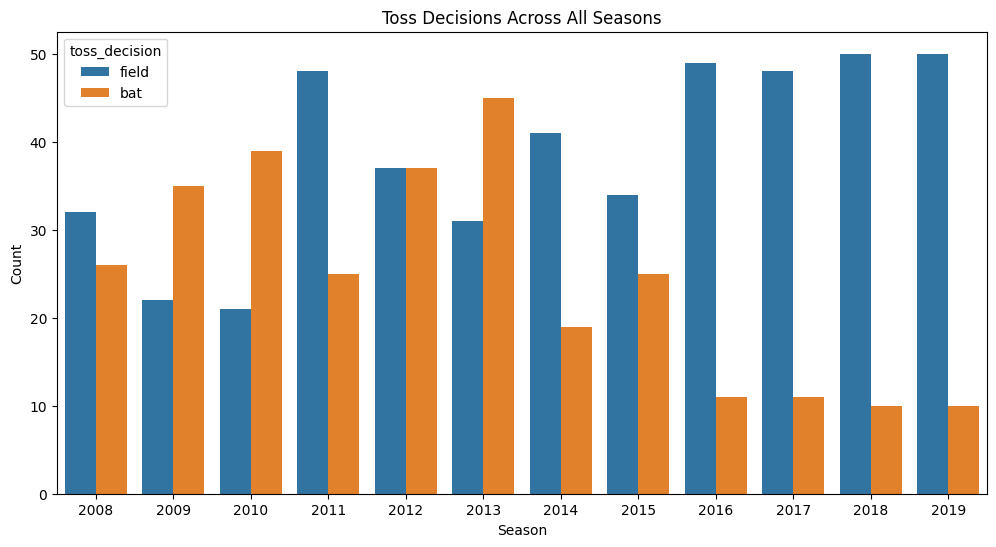

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(x='season', hue='toss_decision', data=match_df)
plt.title('Toss Decisions Across All Seasons') 
plt.xlabel('Season') 
plt.ylabel('Count')
plt.show()

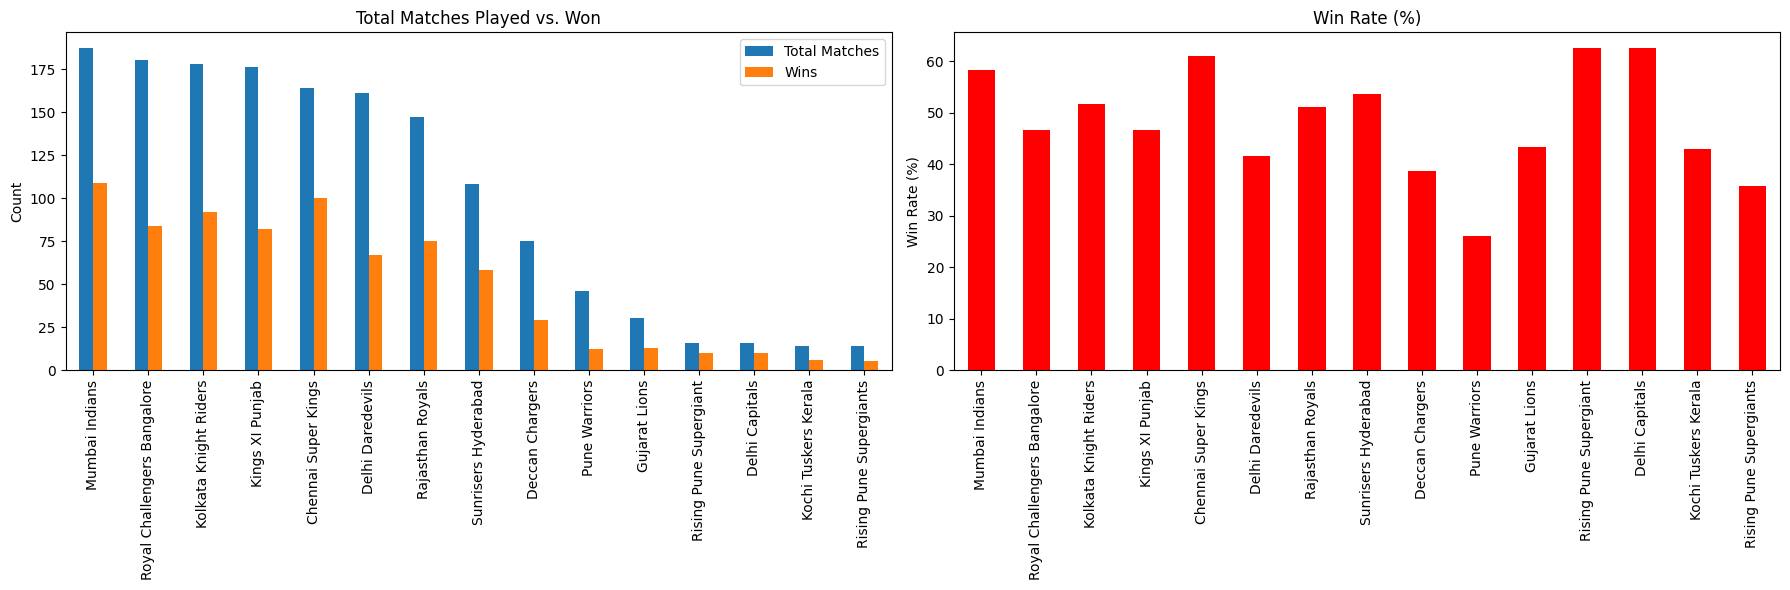

In [24]:
team_matches = pd.concat([match_df['team1'], match_df['team2']]).value_counts()
team_wins = match_df['winner'].value_counts()
team_stats = pd.DataFrame({'Total Matches': team_matches, 'Wins': team_wins}).fillna(0)
team_stats['Win Rate (%)'] = (team_stats['Wins'] / team_stats['Total Matches']) * 100
team_stats = team_stats.sort_values('Total Matches', ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6)) 

team_stats[['Total Matches', 'Wins']].plot(kind='bar', ax=ax1) 
ax1.set_title('Total Matches Played vs. Won')
ax1.set_ylabel('Count')

team_stats['Win Rate (%)'].plot(kind='bar', ax=ax2, color='red') 
ax2.set_title('Win Rate (%)')
ax2.set_ylabel('Win Rate (%)')

plt.tight_layout()
plt.show()

In [25]:
winner_distribution = match_df['winner'].value_counts()
print("Distribution of matches won by teams:\n", winner_distribution)

Distribution of matches won by teams:
 winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64


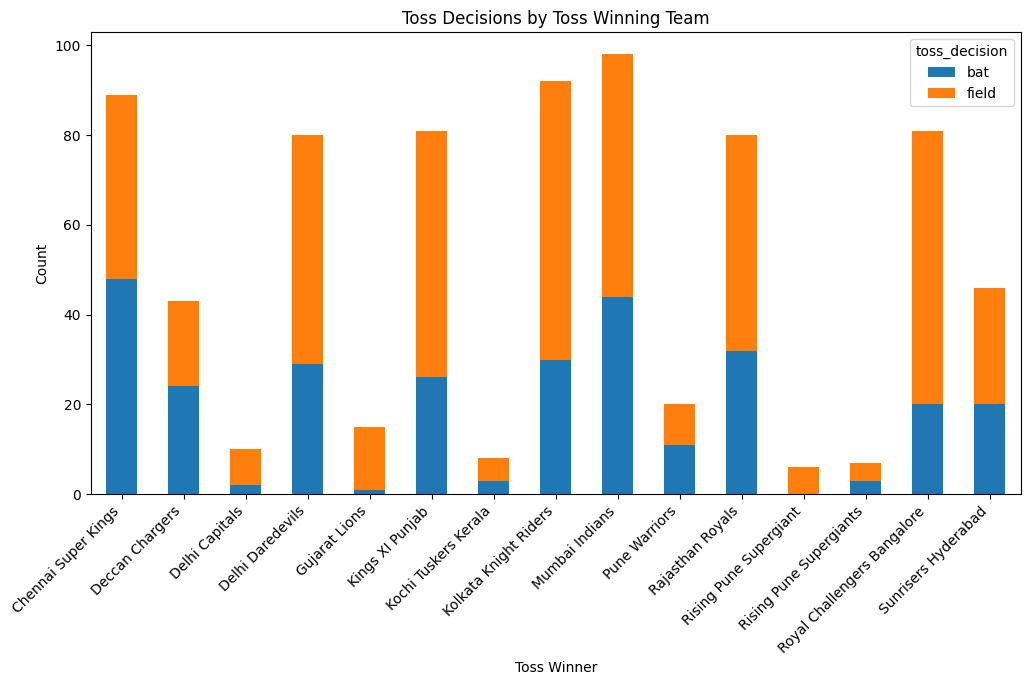

In [26]:
toss_outcomes_series = match_df.groupby('toss_winner')['toss_decision'].value_counts()

plt.figure(figsize=(12, 6))
toss_outcomes_series.unstack(fill_value=0).plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Toss Decisions by Toss Winning Team')
plt.xlabel('Toss Winner')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

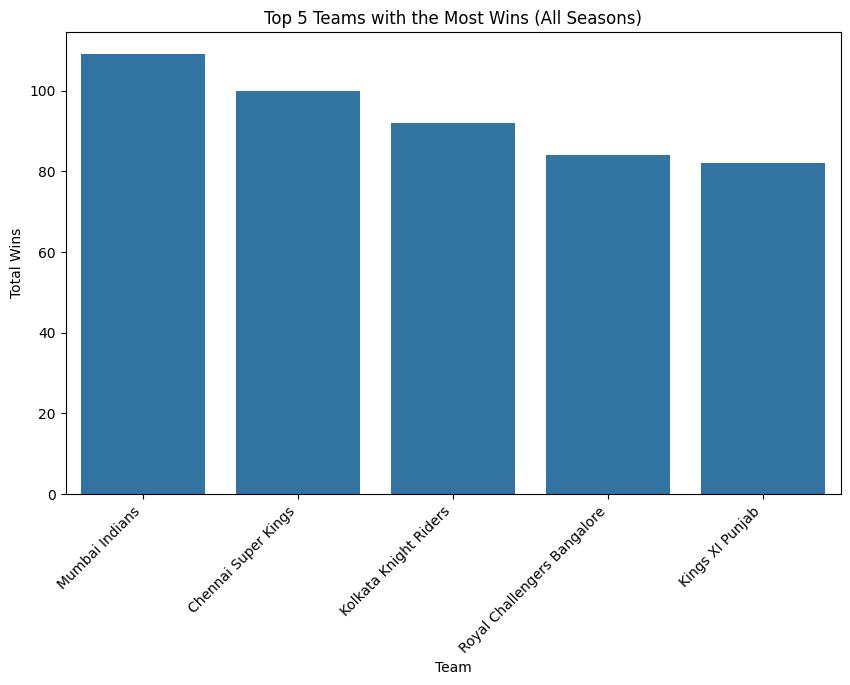

In [27]:
top_5_winners = match_df['winner'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_winners.index, y=top_5_winners.values) 
plt.title('Top 5 Teams with the Most Wins (All Seasons)')
plt.xlabel('Team')
plt.ylabel('Total Wins')
plt.xticks(rotation=45, ha='right')
plt.show()